<a href="https://colab.research.google.com/github/NikkiT16/FinalProjectHR/blob/main/Copy_of_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/NikkiT16/FinalProjectHR/refs/heads/main/MOCK_DATA.csv"
employee_df = pd.read_csv(url)
employee_df.head()
#This cell retrieves the synthetic data in the form as the excel csv data and returns 5 lines to the screen

,employee_id,first_name,last_name,email,phone_number,department,hire_date,salary,manager_id,office_location
0,1,Hermia,Van Son,hvanson0@123-reg.co.uk,350-558-1675,HR,4/11/2012,124502.37,1,2nd Floor
1,2,Walton,Napoleon,wnapoleon1@g.co,717-363-8969,HR,5/19/2018,71608.71,2,PO Box 47198
2,3,Bambie,Leger,bleger2@squidoo.com,423-331-9725,HR,6/6/2019,104403.11,3,Room 1372
3,4,Jacinthe,Heersema,jheersema3@amazon.com,872-366-4444,Marketing,4/12/2022,141654.29,4,Suite 88
4,5,Chane,Bather,cbather4@sohu.com,448-297-2466,HR,4/14/2012,46616.57,5,Suite 1


In [3]:
import random
from datetime import datetime, timedelta

logs = []
actions = ['login', 'view_salary', 'download_report', 'update_profile']
resources = ['dashboard', 'payroll', 'personal_data', 'reporting']
start_time = datetime.now()

for _ in range(5000):
    emp = employee_df.sample(1).iloc[0]
    action = random.choice(actions)
    resource = random.choice(resources)
    duration = round(random.expovariate(1/1.5), 2)  # Exponential distribution
    timestamp = start_time - timedelta(minutes=random.randint(0, 10000))

    logs.append({
        'timestamp': timestamp,
        'employee_id': emp['employee_id'],
        'action': action,
        'resource_accessed': resource,
        'access_duration': duration
    })

logs_df = pd.DataFrame(logs)
#This code is generating synthetic user activity logs for 5,000 events, randomly assigning employees, actions, resources, durations, and timestamps.

In [4]:
print(logs_df)

                      timestamp  employee_id           action  \
0    2025-08-22 00:44:30.896552          504   update_profile   
1    2025-08-22 00:41:30.896552          757            login   
2    2025-08-21 16:32:30.896552          741      view_salary   
3    2025-08-25 16:07:30.896552          747  download_report   
4    2025-08-22 15:48:30.896552          327   update_profile   
...                         ...          ...              ...   
4995 2025-08-23 00:01:30.896552          702   update_profile   
4996 2025-08-20 02:53:30.896552          946      view_salary   
4997 2025-08-24 19:05:30.896552          569      view_salary   
4998 2025-08-22 03:40:30.896552          553  download_report   
4999 2025-08-22 07:40:30.896552           72   update_profile   

     resource_accessed  access_duration  
0            reporting             1.70  
1            reporting             0.72  
2            reporting             1.41  
3        personal_data             0.55  
4        

In [5]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(logs_df[['action', 'resource_accessed']]).toarray()
#This cell converts strings to arrays so the model can understand and work effectively - this is for rescource access.

In [6]:
scaler = MinMaxScaler()
duration_scaled = scaler.fit_transform(logs_df[['access_duration']])
#This code snippet is about scaling the numeric feature access_duration so it can be used in machine learning models more effectively.

In [7]:
import numpy as np

X = np.hstack([encoded_features, duration_scaled])
#This line combines your categorical and numeric features into a single dataset ready for machine learning

In [8]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X)
#This code trains an Isolation Forest to detect anomalies in your log data

IsolationForest(contamination=0.01, random_state=42)

In [9]:
logs_df['anomaly_score'] = model.decision_function(X)
logs_df['anomaly'] = model.predict(X)  # -1: anomaly, 1: normal
# Compute anomaly scores for each log entry and label them:
#   'anomaly_score' gives a continuous measure of how unusual the entry is
#   'anomaly' labels entries as -1 (anomaly) or 1 (normal) using the trained IsolationForest

In [10]:
logs_df['is_anomaly'] = logs_df['anomaly'].map({-1: 'Anomaly', 1: 'Normal'})
# Map numeric anomaly labels to readable strings for easier interpretation:
#   -1 → 'Anomaly', 1 → 'Normal'

In [11]:
print(logs_df['is_anomaly'].value_counts())
# Count how many log entries are labeled as 'Anomaly' vs 'Normal'

is_anomaly
Normal     4950
Anomaly      50
Name: count, dtype: int64


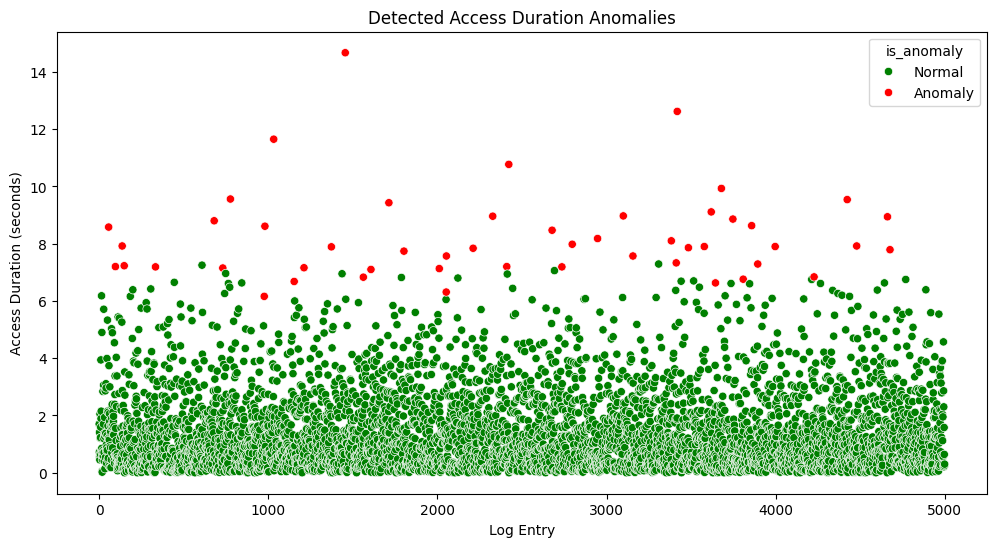

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=logs_df.index, y=logs_df['access_duration'], hue=logs_df['is_anomaly'], palette={'Anomaly':'red', 'Normal':'green'})
plt.title('Detected Access Duration Anomalies')
plt.xlabel('Log Entry')
plt.ylabel('Access Duration (seconds)')
plt.show()
# Visualize access duration for all log entries, highlighting anomalies:
#   - 'Anomaly' entries are shown in red
#   - 'Normal' entries are shown in green
# X-axis: log entry index, Y-axis: access duration in seconds